#Universidad Nacional de Colombia
##Minería de Datos

## Prof. Elizabeth León
## Estudiantes:Frank Steven Cabezas Criollo & Nelson Felipe Moreno Gómez
## **Proyecto**

In [ ]:
# R
%load_ext rpy2.ipython

In [ ]:
# Python
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('expresion_12_muestras.csv')

In [ ]:
df.describe()

,GSM1692587_EA13015_261900_HG-U133_PLUS_2_17.CEL,GSM1692588_EA13015_261899_HG-U133_PLUS_2_16.CEL,GSM1692589_EA13015_261901_HG-U133_PLUS_2_18.CEL,GSM1692590_EA13015_261893_HG-U133_PLUS_2_10.CEL,GSM1692591_EA13015_261894_HG-U133_PLUS_2_11.CEL,GSM1692592_EA13015_261895_HG-U133_PLUS_2_12.CEL,GSM1692593_EA13015_261898_HG-U133_PLUS_2_15.CEL,GSM1692594_EA13015_261897_HG-U133_PLUS_2_14.CEL,GSM1692595_EA13015_261896_HG-U133_PLUS_2_13.CEL,GSM1692596_EA13015_261892_HG-U133_PLUS_2_9.CEL,GSM1692597_EA13015_261891_HG-U133_PLUS_2_8.CEL,GSM1692598_EA13015_261890_HG-U133_PLUS_2_7.CEL
count,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000
mean,6.781058,6.789136,6.782801,6.783528,6.786337,6.792275,6.779043,6.790536,6.789429,6.781253,6.786512,6.794186
std,2.307919,2.300666,2.296958,2.249767,2.335574,2.354283,2.319662,2.329367,2.283790,2.278511,2.352070,2.292233
min,2.904544,3.055039,2.978445,2.948869,3.012545,3.004808,2.984273,3.004138,2.972696,3.100705,3.005259,3.053510
25%,4.961699,4.976158,4.973761,5.042770,4.942138,4.926070,4.956513,4.955059,4.992641,5.008921,4.932680,4.997288
50%,6.327321,6.357602,6.342560,6.334807,6.315754,6.305738,6.348554,6.340190,6.341218,6.323331,6.311411,6.351922
75%,8.247092,8.255226,8.236590,8.151544,8.299346,8.362312,8.256210,8.288162,8.211464,8.175733,8.305097,8.233957
max,14.795314,14.788441,14.802724,14.765421,14.738991,14.710825,14.849232,14.834585,14.808757,14.795834,14.756739,14.756032


<Axes: >

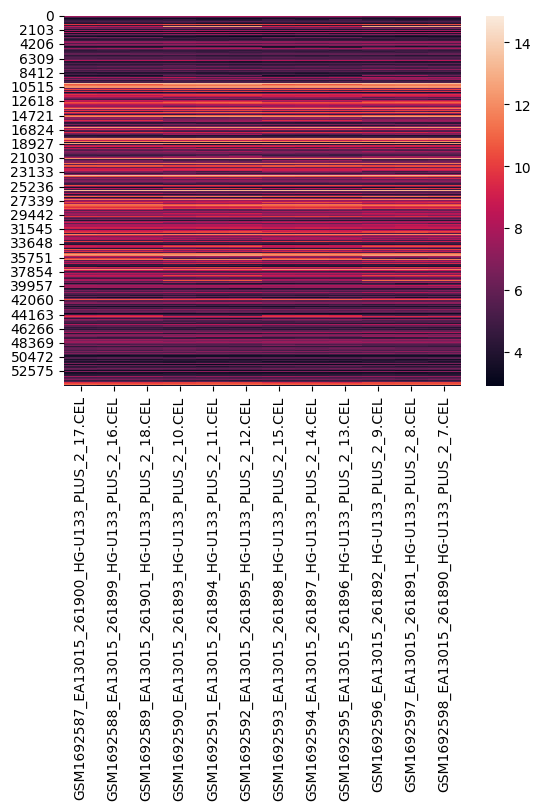

In [245]:
import seaborn as sns
# Exclude the 'ID' column which contains string values
sns.heatmap(df.drop('ID', axis=1))

<Axes: >

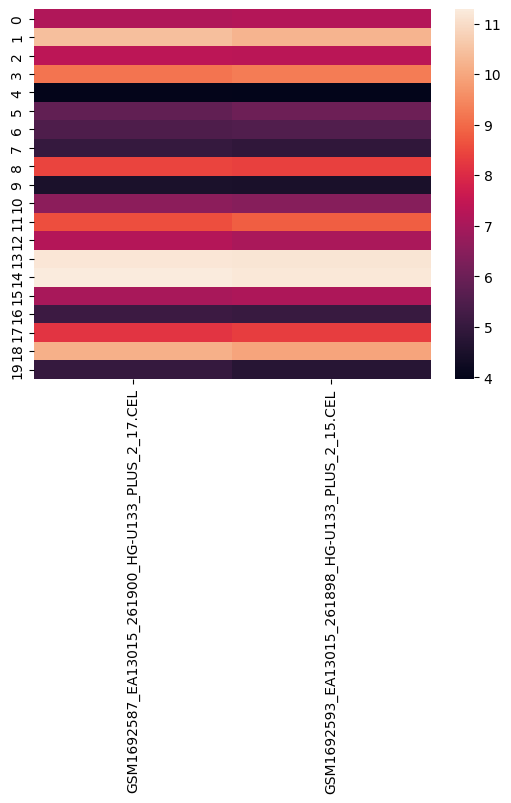

In [323]:
import seaborn as sns
# Exclude the 'ID' column which contains string values
df_no_id = df.drop('ID', axis=1)
sns.heatmap(df_no_id.iloc[0:20,[0,6]])
#.iloc[0:50000,[0,2]

In [ ]:
df.iloc[:,[0,2,3,7,8,9]]
df4col = pd.DataFrame()
df4col['kms11/cfz'] = (df.iloc[:,1]+df.iloc[:,2]+df.iloc[:,3])/3
df4col['kms34/cfz'] = (df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6])/3
df4col['kms11'] = (df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9])/3
df4col['kms34'] = (df.iloc[:,10]+df.iloc[:,11]+df.iloc[:,12])/3


In [ ]:
df4col.describe()

,kms11/cfz,kms34/cfz,kms11,kms34
count,54675.000000,54675.000000,54675.000000,54675.000000
mean,6.784332,6.787380,6.786336,6.787317
std,2.300311,2.308836,2.308852,2.304469
min,3.030859,3.110858,3.089713,3.133037
25%,4.972177,4.972214,4.969145,4.980063
50%,6.341506,6.316411,6.339581,6.326841
75%,8.244563,8.265504,8.249329,8.231609
max,14.790133,14.715978,14.827081,14.769535


<Axes: >

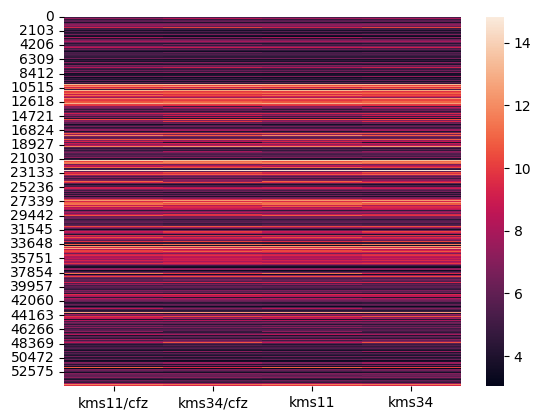

In [326]:
sns.heatmap(df4col.iloc[0:62000])
#sns.heatmap(df4col.iloc[0:20,[0,2]],cmap="crest")

<Axes: >

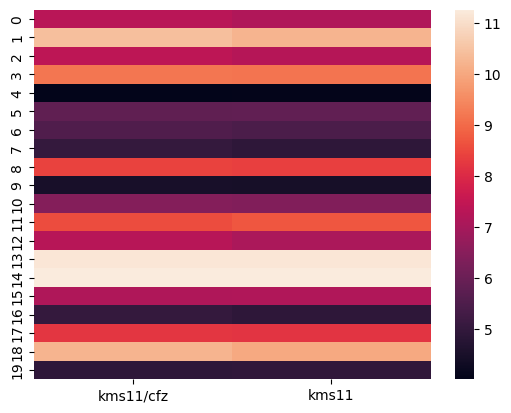

In [324]:
sns.heatmap(df4col.iloc[0:20,[0,2]])
#sns.heatmap(df4col.iloc[0:20,[0,2]],cmap="crest")

<Axes: >

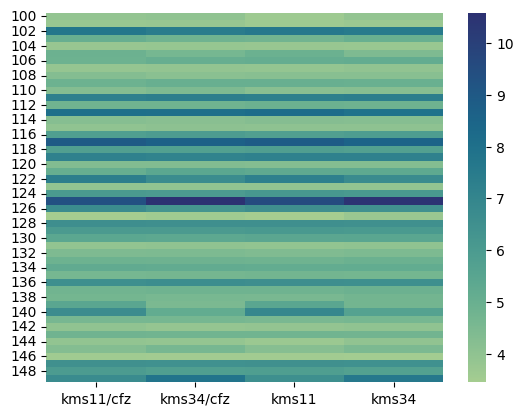

In [230]:
sns.heatmap(df4col.iloc[100:150],cmap="crest")

In [ ]:
df4Log = np.log2(df4col)
df4Log.describe()

,kms11/cfz,kms34/cfz,kms11,kms34
count,54675.000000,54675.000000,54675.000000,54675.000000
mean,2.682457,2.682963,2.682303,2.683315
std,0.478093,0.477874,0.479877,0.476746
min,1.599727,1.637313,1.627473,1.647562
25%,2.313878,2.313888,2.312998,2.316164
50%,2.664826,2.659105,2.664387,2.661485
75%,3.043443,3.047103,3.044277,3.041174
max,3.886563,3.879311,3.890163,3.884553


<Axes: >

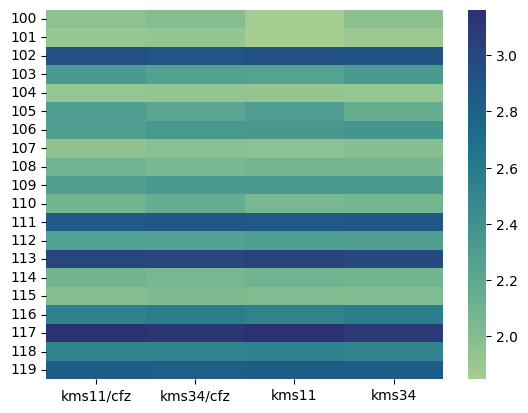

In [253]:
sns.heatmap(df4Log.iloc[100:120],cmap="crest")

<Axes: >

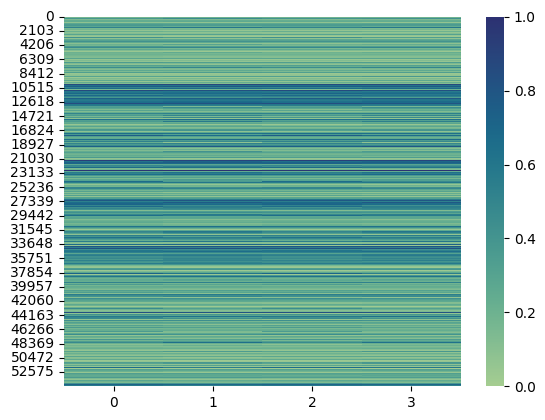

In [329]:
scaler = MinMaxScaler(feature_range=(0,1))
df4scal = scaler.fit_transform(df4col)
sns.heatmap(df4scal[0:55000],cmap="crest")

<Axes: >

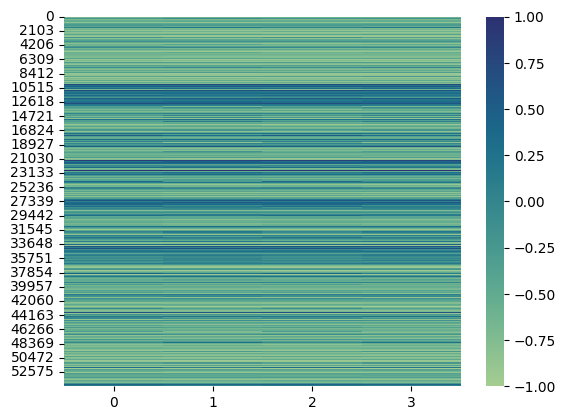

In [330]:
scaler = MinMaxScaler(feature_range=(-1,1))
df4scal = scaler.fit_transform(df4col)
sns.heatmap(df4scal[0:55000],cmap="crest")

In [ ]:
dflog2 = np.log2(df.iloc[:,[1,9]])
dflog2.describe()

,GSM1692587_EA13015_261900_HG-U133_PLUS_2_17.CEL,GSM1692595_EA13015_261896_HG-U133_PLUS_2_13.CEL
count,54675.000000,54675.000000
mean,2.681260,2.685061
std,0.479428,0.473124
min,1.538312,1.571772
25%,2.310834,2.319803
50%,2.661595,2.664760
75%,3.043885,3.037639
max,3.887068,3.888379


In [ ]:
KMS11 = df.iloc[0:100, [1,3]]

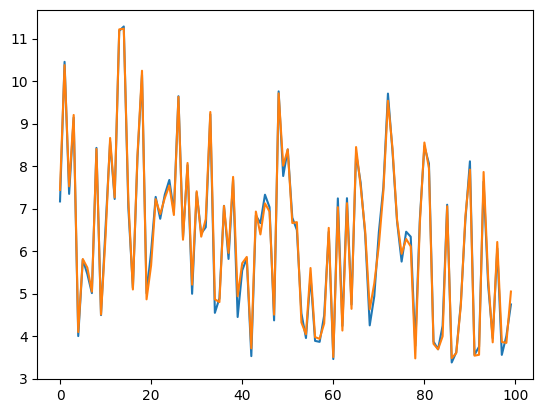

In [ ]:
import seaborn as sns

#sns.scatterplot(data = KMS11)



plt.plot(KMS11)

<Axes: >

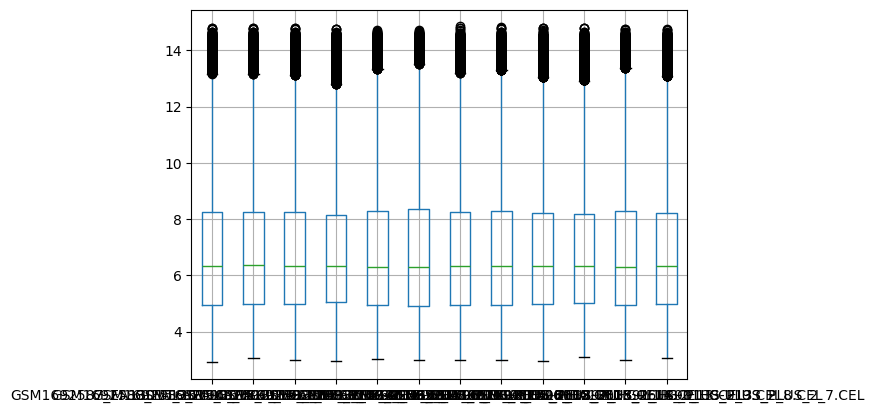

In [ ]:
df.boxplot()

In [304]:
import plotly.express as px
fig = px.imshow(KMS11)
fig

<Axes: >

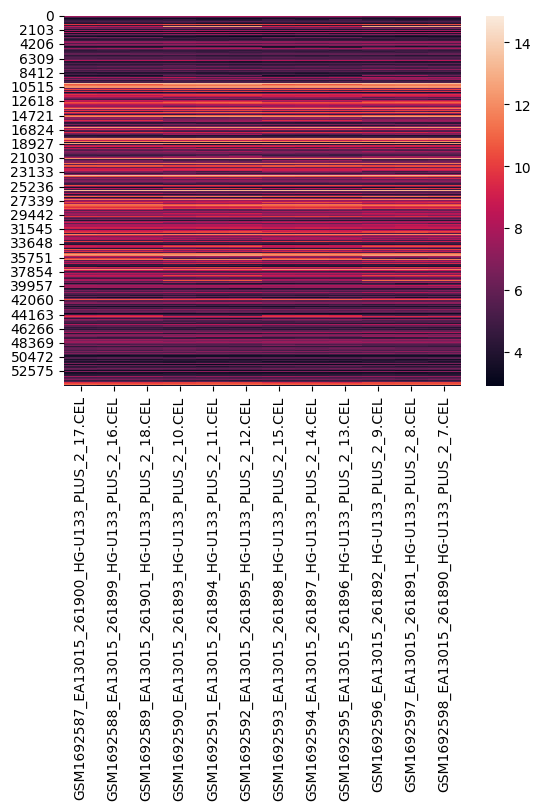

In [ ]:
import seaborn as sns
sns.heatmap(df.drop(['ID'],axis=1))

In [ ]:
data2 = df.drop(['ID'],axis=1)
Z = (data2-data2.mean())/data2.std()

In [ ]:
Z.describe()

,GSM1692587_EA13015_261900_HG-U133_PLUS_2_17.CEL,GSM1692588_EA13015_261899_HG-U133_PLUS_2_16.CEL,GSM1692589_EA13015_261901_HG-U133_PLUS_2_18.CEL,GSM1692590_EA13015_261893_HG-U133_PLUS_2_10.CEL,GSM1692591_EA13015_261894_HG-U133_PLUS_2_11.CEL,GSM1692592_EA13015_261895_HG-U133_PLUS_2_12.CEL,GSM1692593_EA13015_261898_HG-U133_PLUS_2_15.CEL,GSM1692594_EA13015_261897_HG-U133_PLUS_2_14.CEL,GSM1692595_EA13015_261896_HG-U133_PLUS_2_13.CEL,GSM1692596_EA13015_261892_HG-U133_PLUS_2_9.CEL,GSM1692597_EA13015_261891_HG-U133_PLUS_2_8.CEL,GSM1692598_EA13015_261890_HG-U133_PLUS_2_7.CEL
count,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04,5.467500e+04
mean,-1.663456e-16,2.744703e-16,6.653825e-17,1.580283e-16,9.980737e-17,5.073542e-16,-2.328839e-16,1.081247e-16,-2.162493e-16,5.822097e-17,1.663456e-16,2.245666e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.679658e+00,-1.623051e+00,-1.656259e+00,-1.704470e+00,-1.615788e+00,-1.608756e+00,-1.635915e+00,-1.625505e+00,-1.671228e+00,-1.615331e+00,-1.607628e+00,-1.631892e+00
25%,-7.883112e-01,-7.880235e-01,-7.875811e-01,-7.737506e-01,-7.896130e-01,-7.926853e-01,-7.856877e-01,-7.879725e-01,-7.867574e-01,-7.778465e-01,-7.881704e-01,-7.839072e-01
50%,-1.965999e-01,-1.875694e-01,-1.916628e-01,-1.994520e-01,-2.014852e-01,-2.066604e-01,-1.855826e-01,-1.933342e-01,-1.962579e-01,-2.009742e-01,-2.019930e-01,-1.929401e-01
75%,6.352187e-01,6.372458e-01,6.329191e-01,6.080705e-01,6.478101e-01,6.668852e-01,6.368024e-01,6.429324e-01,6.226642e-01,6.120141e-01,6.456374e-01,6.281085e-01
max,3.472502e+00,3.476952e+00,3.491541e+00,3.547876e+00,3.405011e+00,3.363465e+00,3.479036e+00,3.453320e+00,3.511412e+00,3.517465e+00,3.388601e+00,3.473402e+00


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==12) & ((Z <= 3).sum(axis=1)==12),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 54675
Number of rows after discarding missing values = 54355


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z3 = Z.loc[((Z > -3).sum(axis=1)==12) & ((Z >= 3).sum(axis=1)==12),:]
print('Number of rows after discarding missing values = %d' % (Z3.shape[0]))

Number of rows before discarding outliers = 54675
Number of rows after discarding missing values = 163


In [ ]:
Z3.shape

(163, 12)

In [ ]:
Z3.describe()

,GSM1692587_EA13015_261900_HG-U133_PLUS_2_17.CEL,GSM1692588_EA13015_261899_HG-U133_PLUS_2_16.CEL,GSM1692589_EA13015_261901_HG-U133_PLUS_2_18.CEL,GSM1692590_EA13015_261893_HG-U133_PLUS_2_10.CEL,GSM1692591_EA13015_261894_HG-U133_PLUS_2_11.CEL,GSM1692592_EA13015_261895_HG-U133_PLUS_2_12.CEL,GSM1692593_EA13015_261898_HG-U133_PLUS_2_15.CEL,GSM1692594_EA13015_261897_HG-U133_PLUS_2_14.CEL,GSM1692595_EA13015_261896_HG-U133_PLUS_2_13.CEL,GSM1692596_EA13015_261892_HG-U133_PLUS_2_9.CEL,GSM1692597_EA13015_261891_HG-U133_PLUS_2_8.CEL,GSM1692598_EA13015_261890_HG-U133_PLUS_2_7.CEL
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.231215,3.232607,3.244385,3.319217,3.196450,3.166751,3.216234,3.197094,3.262050,3.278663,3.174634,3.247137
std,0.103761,0.106164,0.105590,0.097403,0.089549,0.088964,0.101166,0.100234,0.102010,0.093965,0.088323,0.096001
min,3.014509,3.023648,3.038352,3.106338,3.019409,3.001798,3.035604,3.004738,3.065126,3.071019,3.003757,3.074562
25%,3.150176,3.151026,3.162484,3.249366,3.129456,3.100993,3.136398,3.119909,3.180589,3.206674,3.106116,3.174256
50%,3.245553,3.241701,3.257395,3.322782,3.191298,3.156910,3.218016,3.200186,3.270586,3.267593,3.166373,3.240428
75%,3.303061,3.308629,3.320400,3.385039,3.262880,3.229497,3.289801,3.265405,3.335586,3.354004,3.238961,3.316203
max,3.472502,3.476952,3.491541,3.547876,3.405011,3.363465,3.479036,3.453320,3.511412,3.517465,3.388601,3.473402


<Axes: >

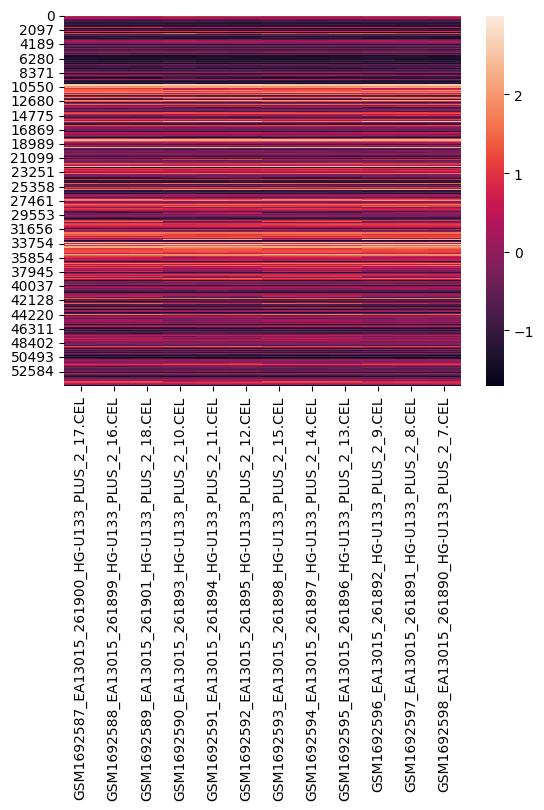

In [318]:
sns.heatmap(Z2)

<Axes: >

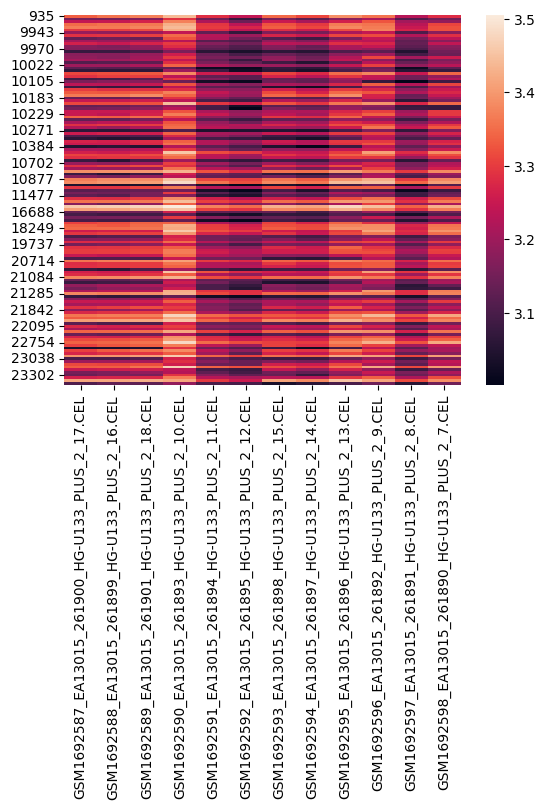

In [331]:
sns.heatmap(Z3.iloc[0:136])

In [ ]:

from sklearn import preprocessing

#x = df.values #returns a numpy array

scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform( df.drop('ID', axis=1))
df_scaled = pd.DataFrame(normalized_data)

In [ ]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.358604,0.364457,0.377314,0.373552,0.356953,0.358203,0.356187,0.348256,0.357758,0.357092,0.361392,0.355041
1,0.634861,0.625912,0.625613,0.615604,0.630780,0.634613,0.611564,0.614385,0.607690,0.589547,0.601655,0.590126
2,0.373498,0.365588,0.384373,0.332732,0.347860,0.360590,0.366035,0.362202,0.353508,0.328118,0.344102,0.341443
3,0.524616,0.519142,0.526452,0.523859,0.515124,0.502314,0.530502,0.515046,0.516603,0.523513,0.519587,0.523158
4,0.092102,0.075653,0.094376,0.107476,0.085773,0.078121,0.083075,0.088006,0.096883,0.097578,0.088277,0.073776
...,...,...,...,...,...,...,...,...,...,...,...,...
54670,0.111166,0.095174,0.115795,0.104063,0.098457,0.103326,0.098048,0.097879,0.106387,0.091617,0.096843,0.110037
54671,0.080731,0.081289,0.090060,0.075642,0.091809,0.083267,0.076758,0.079396,0.092084,0.093112,0.086005,0.088298
54672,0.051884,0.040537,0.051459,0.047423,0.049700,0.051039,0.032253,0.043066,0.031935,0.046174,0.049142,0.049541
54673,0.125841,0.120554,0.127811,0.135212,0.118855,0.114239,0.116561,0.116665,0.119003,0.112327,0.126054,0.127875


In [ ]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000
mean,0.326010,0.318245,0.321741,0.324516,0.321819,0.323549,0.319830,0.320055,0.322467,0.314708,0.321768,0.319647
std,0.194093,0.196078,0.194258,0.190391,0.199172,0.201117,0.195505,0.196896,0.192952,0.194826,0.200151,0.195875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173004,0.163731,0.168747,0.177201,0.164551,0.164126,0.166224,0.164907,0.170660,0.163163,0.164015,0.166099
50%,0.287852,0.281467,0.284509,0.286542,0.281689,0.281986,0.283548,0.281989,0.284598,0.275553,0.281339,0.281855
75%,0.449302,0.443195,0.444691,0.440287,0.450844,0.457671,0.444328,0.446646,0.442611,0.433944,0.450993,0.442678
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import plotly.express as px
fig = px.imshow(df_scaled)
fig

NameError: name 'df_scaled' is not defined

<Axes: >

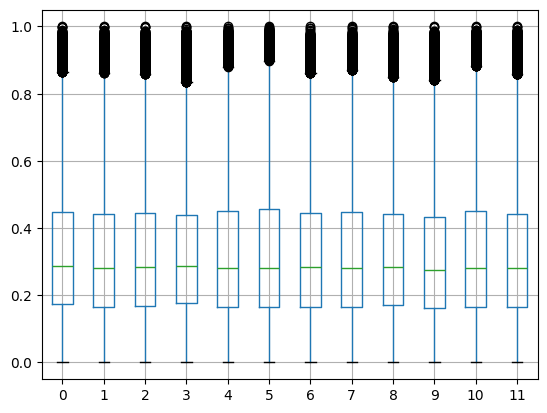

In [ ]:
df_scaled.boxplot()

(54675, 8)

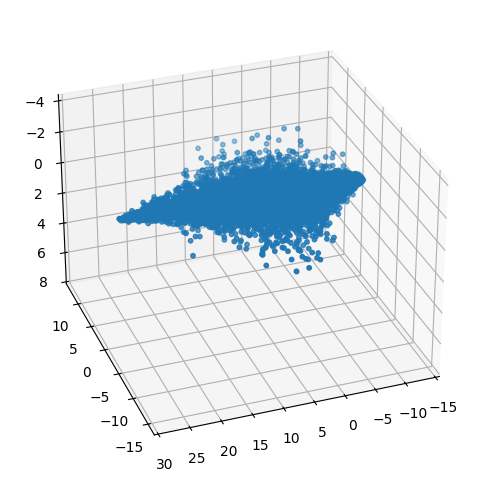

In [310]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=8).fit_transform(df_no_id)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],

    s=10,
)
X_reduced.shape

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


X_reduced = PCA(n_components=4).fit_transform(df.drop('ID', axis=1))

X_reduced.shape

(54675, 4)

In [ ]:
X_reduced

array([[ 1.59770913e+00, -4.69316271e-03, -4.64177507e-02,
         1.46583082e-01],
       [ 1.20007120e+01, -2.37337229e-01,  4.12127378e-01,
         1.59928677e-01],
       [ 1.38405932e+00, -5.08293624e-01,  1.92459358e-01,
        -1.95086847e-01],
       ...,
       [-1.12574998e+01,  1.98996770e-01,  5.14653366e-02,
        -2.11226729e-01],
       [-8.14074835e+00,  6.85587343e-02, -5.27460327e-02,
        -3.15141192e-02],
       [-9.37981636e+00, -2.14326852e-03,  6.37879397e-02,
        -2.65403365e-01]])

<Axes: >

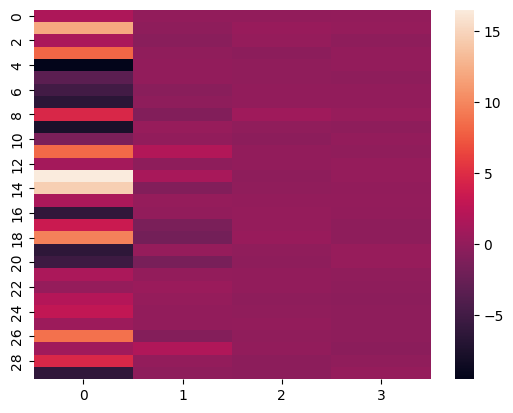

In [ ]:
sns.heatmap(X_reduced[0:30])

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.3 MB/s eta 0:00:00


In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("affy")
BiocManager::install("hgu133plus2.db")

library(affy)

#descargar los datos, descomprimir y reunir todos los .CEL en un mismo directorio
# Leer todos los archivos CEL de un directorio
data <- ReadAffy(celfile.path = "/content/resultados")


eset <- rma(data)  # expresión log2 normalizada

exprs_matrix <- exprs(eset)
head(exprs_matrix)

######Anotación de los datos

library(hgu133plus2.db)

# Obtener IDs de genes
probe_ids <- rownames(exprs_matrix)
gene_symbols <- mapIds(hgu133plus2.db, keys = probe_ids,
                       column = "SYMBOL", keytype = "PROBEID", multiVals = "first")

# Agregar los nombres de gen como fila nueva
exprs_annotated <- cbind(GeneSymbol = gene_symbols, exprs_matrix)

# Ver resultado
head(exprs_annotated)



Background correcting
Normalizing
Calculating Expression
          GeneSymbol GSM1692587_EA13015_261900_HG-U133_PLUS_2_17.CEL
1007_s_at "DDR1"     "7.16862003900046"                             
1053_at   "RFC2"     "10.4535252764675"                             
117_at    "HSPA6"    "7.34572309554384"                             
121_at    "PAX8"     "9.14263706562306"                             
1255_g_at "GUCA1A"   "3.99970436456039"                             
1294_at   "UBA7"     "5.79949332236472"                             
          GSM1692588_EA13015_261899_HG-U133_PLUS_2_16.CEL
1007_s_at "7.33136127848993"                             
1053_at   "10.3991149897298"                             
117_at    "7.34463450629882"                             
121_at    "9.14634032608317"                             
1255_g_at "3.94271056151281"                             
1294_at   "5.8125101702533"                              
          GSM1692589_EA13015_261901_HG-U133_PLUS_2_18.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.25.tar.gz'
Content type 'application/x-gzip' length 593414 bytes (579 KB)
downloaded 579 KB


The downloaded source packages are in
	‘/tmp/Rtmp6B2KcJ/downloaded_packages’
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Installing package(s) 'BiocVersion', 'affy'
also installing the dependencies ‘BiocGenerics’, ‘Biobase’, ‘affyio’, ‘preprocessCore’

trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/BiocGenerics_0.54.0.tar.gz'
trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/Biobase_2.68.0.tar.gz'
trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/affyio_1.78.0.tar.gz'
trying URL